#Analisando a Carteira de Determinadas Ações ao longo de Determinado Tempo




In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [24]:
acoes = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA"]
carteira = web.get_data_yahoo(acoes, period="5y")["Adj Close"]
ibovespa = web.get_data_yahoo("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


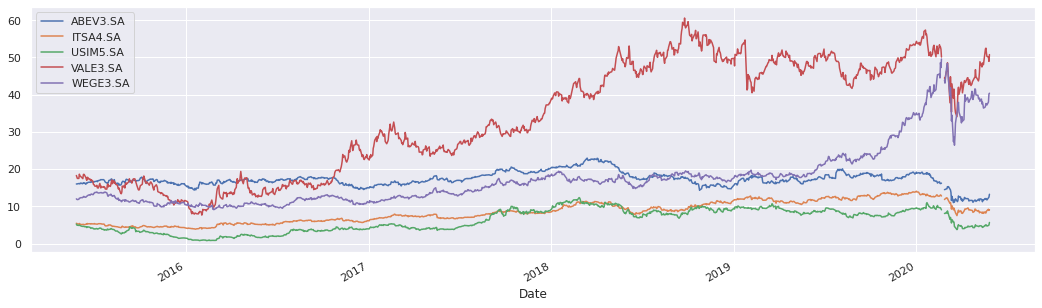

In [25]:
sns.set()
carteira.plot(figsize=(18,5))

In [26]:
carteira_norm = (carteira/ carteira.iloc[0])*10000
carteira_norm

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-05-27,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2015-05-28,9989.190052,9945.457385,9500.925061,9804.295511,9890.780779
2015-05-29,10016.214327,9618.309984,9426.987427,9570.405086,9833.220701
2015-06-01,10054.054498,9627.346274,9334.565839,9565.632365,9902.293270
2015-06-02,10081.226284,9922.392881,9537.893878,10190.929683,10149.509373
...,...,...,...,...,...
2020-05-21,7409.509066,15915.686098,9471.284036,27934.846731,31124.940301
2020-05-22,7322.191406,16227.040296,8994.861277,27464.985891,30958.677125
2020-05-25,7652.750737,16923.008401,9299.772460,27372.105405,31623.739342


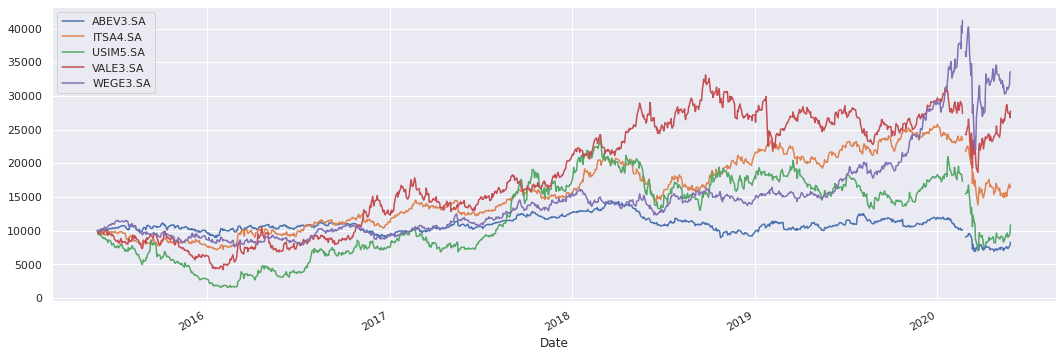

In [27]:
carteira_norm.plot(figsize=(18,6))

In [28]:
carteira_norm["Saldo"] = carteira_norm.sum(axis=1)
carteira_norm

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,Saldo
Date,,,,,,
2015-05-27,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2015-05-28,9989.190052,9945.457385,9500.925061,9804.295511,9890.780779,49130.648788
2015-05-29,10016.214327,9618.309984,9426.987427,9570.405086,9833.220701,48465.137525
2015-06-01,10054.054498,9627.346274,9334.565839,9565.632365,9902.293270,48483.892246
2015-06-02,10081.226284,9922.392881,9537.893878,10190.929683,10149.509373,49881.952100
...,...,...,...,...,...,...
2020-05-21,7409.509066,15915.686098,9471.284036,27934.846731,31124.940301,91856.266231
2020-05-22,7322.191406,16227.040296,8994.861277,27464.985891,30958.677125,90967.755995
2020-05-25,7652.750737,16923.008401,9299.772460,27372.105405,31623.739342,92871.376345


In [29]:
ibovespa_norm = (ibovespa / ibovespa.iloc[0])*50000
ibovespa_norm

Date
2015-05-27    50000.000000
2015-05-28    49760.306807
2015-05-29    48639.280183
2015-06-01    48889.114241
2015-06-02    50000.000000
                  ...     
2020-05-21    76542.333505
2020-05-22    75755.033557
2020-05-25    78972.453721
2020-05-26    78793.605723
2020-05-27    80821.382765
Name: Adj Close, Length: 1236, dtype: float64

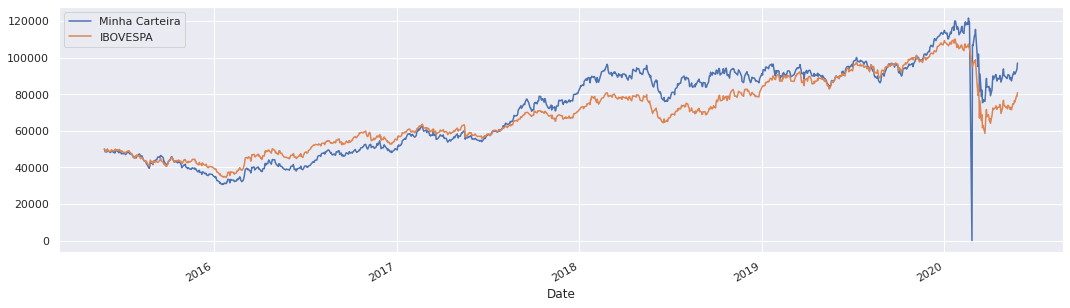

In [30]:
carteira_norm["Saldo"].plot(figsize=(18,5), label='Minha Carteira')
ibovespa_norm.plot(label="IBOVESPA")
plt.legend()